In [71]:
from sympy import Symbol, symbols
import sympy as sp
import numpy as np
sp.init_printing(use_unicode=True)
sp.init_session(quiet=True)
from scipy.signal import find_peaks
%matplotlib inline

In [72]:
# def symbols 
# note: in the symbols class do not!! put a comma to separate them

t1, t2, t3, r1, r2, r3 = symbols("t1 t2 t3 r1 r2 r3")
L1, L2, delta_L1, delta_L2 = symbols("L1 L2 delta_L1 delta_L2")
k = Symbol("k")


In [73]:
mirror_matrices = []

transmissivity = [t1, t2, t3]
reflectivity = [r1, r2, r3]

for (t, r) in zip(transmissivity, reflectivity):
    M = (1 / (1j * t)) * Matrix([[-1, -r], [r, 1]])
    mirror_matrices.append(M)

In [74]:
mirror_matrices[0]

⎡  1.0⋅ⅈ     1.0⋅ⅈ⋅r₁⎤
⎢  ─────     ────────⎥
⎢   t₁          t₁   ⎥
⎢                    ⎥
⎢-1.0⋅ⅈ⋅r₁   -1.0⋅ⅈ  ⎥
⎢──────────  ─────── ⎥
⎣    t₁        t₁    ⎦

In [75]:
propagation_matrices = []

L = [L1, L2]
delta = [delta_L1, delta_L2]

for (L, delta) in zip(L, delta):
    M = Matrix([[sp.exp(1j * k * (L + delta)), 0], [0, sp.exp(-1j * k * (L + delta))]])
    propagation_matrices.append(M)

In [76]:
propagation_matrices[0]

⎡ 1.0⋅ⅈ⋅k⋅(L₁ + δ_L1)                       ⎤
⎢ℯ                               0          ⎥
⎢                                           ⎥
⎢                       -1.0⋅ⅈ⋅k⋅(L₁ + δ_L1)⎥
⎣         0            ℯ                    ⎦

In [77]:
transfer_matrix = mirror_matrices[2]*propagation_matrices[1]*mirror_matrices[1]*propagation_matrices[0]*mirror_matrices[0]

In [78]:
transfer_matrix

⎡           ⎛          1.0⋅ⅈ⋅k⋅(L₂ + δ_L2)           -1.0⋅ⅈ⋅k⋅(L₂ + δ_L2)⎞     ↪
⎢           ⎜  1.0⋅r₂⋅ℯ                      1.0⋅r₃⋅ℯ                    ⎟  -1 ↪
⎢  1.0⋅ⅈ⋅r₁⋅⎜- ─────────────────────────── + ────────────────────────────⎟⋅ℯ   ↪
⎢           ⎝             t₂⋅t₃                         t₂⋅t₃            ⎠     ↪
⎢- ─────────────────────────────────────────────────────────────────────────── ↪
⎢                                               t₁                             ↪
⎢                                                                              ↪
⎢           ⎛           1.0⋅ⅈ⋅k⋅(L₂ + δ_L2)        -1.0⋅ⅈ⋅k⋅(L₂ + δ_L2)⎞       ↪
⎢           ⎜1.0⋅r₂⋅r₃⋅ℯ                      1.0⋅ℯ                    ⎟  -1.0 ↪
⎢  1.0⋅ⅈ⋅r₁⋅⎜────────────────────────────── - ─────────────────────────⎟⋅ℯ     ↪
⎢           ⎝            t₂⋅t₃                          t₂⋅t₃          ⎠       ↪
⎢- ─────────────────────────────────────────────────────────────────────────── ↪
⎣                           

In [79]:
#useless

field_in, field_ref, field_out = symbols("field_in, field_ref, field_out")
left_side = Matrix([[field_in], [field_ref]])
right_side = Matrix([[field_out], [0]])

In [80]:
# taken from the dumont thesis

reflection_coeff = -transfer_matrix[1, 0] / transfer_matrix[1, 1]
transmission_coeff = (transfer_matrix[0, 0]*transfer_matrix[1, 1] - transfer_matrix[0, 1]*transfer_matrix[1, 0]) / transfer_matrix[1, 1]


In [81]:
transmitted_power = sp.Abs(transmission_coeff)**2

In [82]:
# def my variables

wavelength = 1064e-9 # m
c = 3e8 # m/s
L1a = 1 # m, to be varied
L2a = 1
delta_L1a = 0 # m, the variation
delta_L2a = 0
ka = 2 * np.pi / wavelength
omegaa = c/ wavelength

# mirror specs
t1a, t2a, t3a = np.sqrt(0.1), np.sqrt(0.1), np.sqrt(0.1)
r1a, r2a, r3a = np.sqrt(1 - t1a**2), np.sqrt(1 - t2a**2), np.sqrt(1 - t3a**2)

# frequency range
delta_nu = np.linspace(-40e6, 40e6, 500)
omega = 2 * np.pi * delta_nu
k_range = omega /c

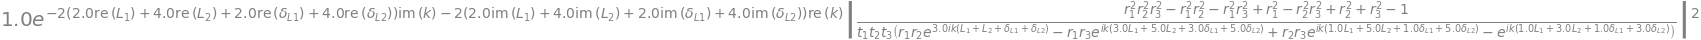

In [61]:
# check if the result resembles the paper

transmitted_power.simplify()

In [83]:
transmitted_power_numeric = transmitted_power.subs([(L1, L1a), (L2, L2a), (delta_L1,delta_L1a), (delta_L2,delta_L2a), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)])

function = lambdify(k, transmitted_power_numeric, "numpy")
values = function(k_range)

In [84]:
transmitted_power_numeric.free_symbols

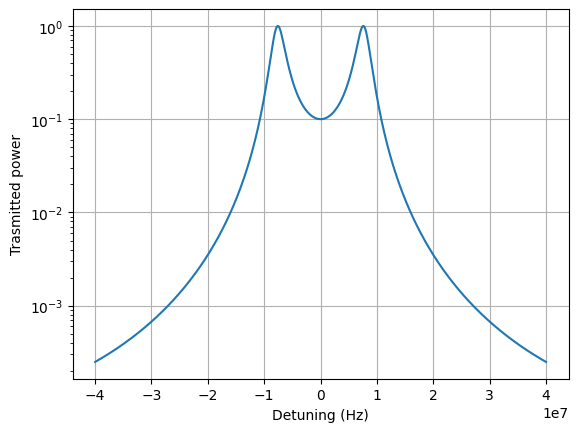

In [63]:
plt.plot(delta_nu, values)
plt.yscale("log")
plt.ylabel("Trasmitted power")
plt.xlabel("Detuning (Hz)")
plt.grid()
plt.show()

yay works now!! now switch the deltas to also be variables in the function


Offset d1=0  d2=0
Peak frequencies [MHz]: [-7.61523046  7.61523046]
Peak values: [0.99928407 0.99928407]
Peak separation:  15.230460921843688

Offset d1=5e-08  d2=5e-08
Peak frequencies [MHz]: [-21.72344689  -6.49298597]
Peak values: [0.99889588 0.99958834]
Peak separation:  15.23046092184369

Offset d1=-5e-08  d2=-5e-08
Peak frequencies [MHz]: [ 6.49298597 21.72344689]
Peak values: [0.99958832 0.998896  ]
Peak separation:  15.230460921843687


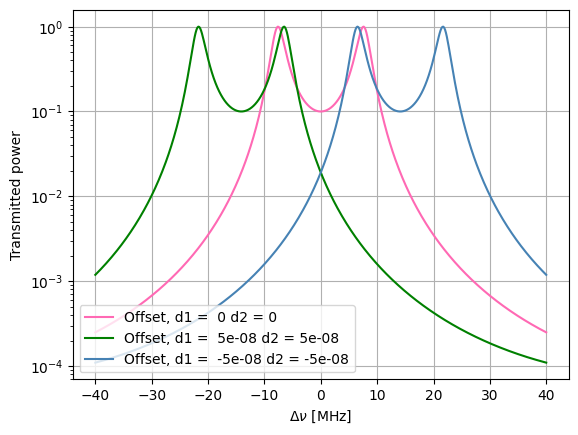

In [85]:
delta_L1_arr = [0, 50e-9, -50e-9]
delta_L2_arr = [0, 50e-9, -50e-9]
delta_nu = np.linspace(-40e6, 40e6, 500)
colors = ["hotpink", "green", "steelblue"]
peak_separation = []
res_omega = []
peak_pos = []

# the microscopic offset is introducing the asymmetry between the peaks

for (d1, d2, color) in zip(delta_L1_arr, delta_L2_arr, colors):

    # create the function
    transmitted_power_numeric = transmitted_power.subs([(L1, L1a), (L2, L2a), (delta_L1,d1), (delta_L2,d2), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)])
    function = lambdify(k, transmitted_power_numeric, "numpy")

    # compensate for the shift in freq
    # order = 2 * (L1a + L2a - d1 + d2) / wavelength
    # delta_omega = 2 * np.pi * delta_nu
    # omega_0 = c * np.pi / (L1a + L2a )
    # delta_omega = delta_omega + order * omega_0 * 2 * (-d1 + d2) / (L1a + L2a)

    # k_range = omega_scan /c 


    # this is the true good way to go about it !!!!!
    fsr = c / (2 * (L1a + L2a + d2 - d1))
    # to be resonant at our laser freq q must be 3.76e6, give or take, found by trial and error to match the resonant freq of the cavity to the laser freq
    resonance_nu = 3.76e6 * fsr
    nu_bottom = resonance_nu - 40e6
    nu_top = resonance_nu + 40e6
    nu_sweep = np.linspace(nu_bottom, nu_top, 500)
    k_range = nu_sweep * 2 * np.pi / c
    values = function(k_range)

    res_omega.append(resonance_nu * 2 * np.pi)

    peaks, properties = find_peaks(values)
    peak_freqs_mhz = delta_nu[peaks] * 1e-6
    print(f"\nOffset d1={d1}  d2={d2}")
    print("Peak frequencies [MHz]:", peak_freqs_mhz)
    print("Peak values:", values[peaks])
    print("Peak separation: ", peak_freqs_mhz[1] - peak_freqs_mhz[0])
    peak_separation.append(peak_freqs_mhz[1] - peak_freqs_mhz[0])
    peak_pos.append(peak_freqs_mhz[0])

    plt.plot(delta_nu * 1e-6, values, label = "Offset, d1 =  " + str(d1) + " d2 = " + str(d2), c = color)


plt.grid()
plt.legend(loc = "lower left")
plt.ylabel("Transmitted power")
plt.xlabel(r"$\Delta \nu$ [MHz]")
plt.yscale("log")

# observations
- indeed when L_ is zero, there is no change in the transmitted power, only translation in frequency

- however, if L+ is zero there is both a shift and an attenuation of power (to be expected but bounce that idea back on someone)
- the bigger the difference the bigger the attenuation

In [68]:
theory_diff = res_omega[1] * (100e-9) / (L1a + L2a) 
coded_diff = abs((peak_pos[1] - peak_pos[0]) * 1e6 * 2 * np.pi )
print(((theory_diff - coded_diff)/coded_diff) * 100)

# agrees to 0.05 percent - is that acceptable


-0.05823863636363399


# frequency change with changing mirror position

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

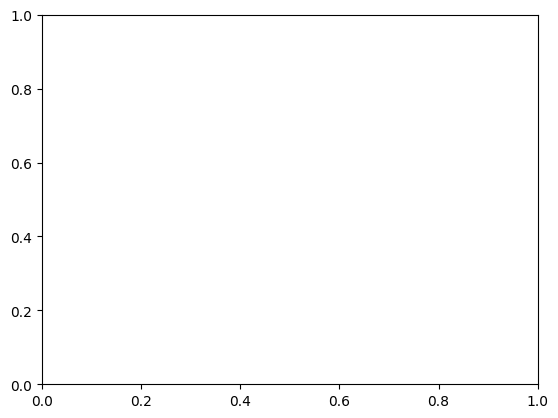

In [69]:
transmitted_power_numeric = transmission_coeff.subs([(L1, L1a), (L2, L2a), (delta_L1,delta_L1a), (delta_L2,delta_L2a), (t1, 10e-6), (t2, 10e-6), (t3,0), (r1, r1a), (r2,r2a), (r3,r3a)])

function = lambdify(k, transmitted_power_numeric, "numpy")

phase = np.angle(function(k_range))
detuning = np.linspace(-70e6, 70e6, 500) 

plt.plot(detuning, phase)

plt.xlabel('Detuning')
plt.ylabel('Phase')
plt.legend(loc='best')
plt.show()

In [70]:
print(phase)

0.0


In [ ]:
# to find the phase response of each cavity separately, the total transmissivity can be set to one (resonance cond)
# then it can be solved for phase 

# transmission_coeff_numerical = transmission_coeff.subs([(L1, L1a), (L2, L2a), (delta_L1,delta_L1a), (delta_L2,delta_L2a), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)])
# phase_condition = sp.arg(transmission_coeff_numerical)
# solutions = sp.solve(sp.Eq(phase_condition, 0), k, 9e5, dict = True)


# replace the exponent to represent the phase
phi1, phi2 = symbols("phi1 phi2")
transmission_coeff_phase = transmission_coeff.subs([(k * (L2 + delta_L2), phi2), (k * (L1 + delta_L1), phi1), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)]).simplify()


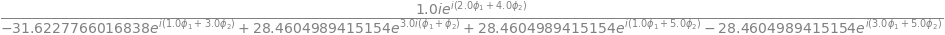

In [47]:
transmission_coeff_phase

In [38]:
print(solutions)

[{k: 97.5523137398941}]


figure out how to separate the modes, what parameter dictates the shape, t3 = 0, vary t1, t2, l1, l2, then ask PE for a mechanical paper/calculation thingy

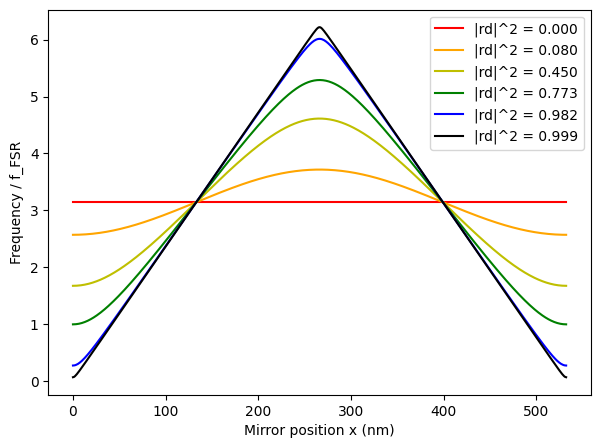

In [425]:
# adapted from doi:10.1088/1367-2630/10/9/095008

# k = 2.0 * np.pi / wavelength

# very mirror displacement from x=0 to x = lambda/2
x_vals = np.linspace(0, 0.5*wavelength, 500)

#  dimensionless "frequency" shift (in units of f_FSR) - treat f_FSR = 1 for plotting, so the vertical axis is "frequency / f_FSR".


phi_r = 0.0  # to be changed later

#   δ_T^{(0)}(x) = 2*phi_r + 2*cos^(-1)( |r_d| * cos( 2*k*x ) )

def cavity_detuning(x, rd_mag, phi_r):
    """
    x - mirror 2 position in meters
    rd_mag - power reflectivity
    phi_r = reflection phase (i dont touch it for now)
    returns the dimensionless frequency shift (in units of f_FSR)
    """
    # dimensionless displacement delta = 2*k*x
    delta = 2.0 * k * x
    # resonance condition
    return 2.0*phi_r + 2.0*np.arccos(rd_mag * np.cos(delta))

plt.figure(figsize=(7,5))

colors = ['r','orange','y','g','b','k']
for idx, R_val in enumerate(reflectivity_list):
    rd_mag = np.sqrt(R_val)  # amplitude reflectivity from power reflectivity
    y_vals = []
    for x_ in x_vals:
        # For simplicity just plot a single branch from the formula
        y = cavity_detuning(x_, rd_mag, phi_r)
        y_vals.append(y)
    plt.plot(x_vals*1e9, y_vals, color=colors[idx],
             label=f'|rd|^2 = {R_val:.3f}')

plt.xlabel('Mirror position x (nm)')
plt.ylabel('Frequency / f_FSR')
plt.legend(loc='best')
plt.show()

# 2d analysis changing L1 only 

In [399]:
# in light of what it is i think it is useless

delta_L1_range = np.linspace(-150e-9, 150e-9, 500)
delta_nu = np.linspace(-40e6, 40e6, 500)
Delta_nu, Delta_L1 = np.meshgrid(delta_nu, delta_L1_range)


transmitted_power_numeric = transmitted_power.subs([(L1, L1a), (L2, L2a), (delta_L2, 0), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)])
function = lambdify((k, delta_L1), transmitted_power_numeric, "numpy")

for delta in Delta_L1:
    # compensate for the shift in freq
    fsr = c / (2 * (L1a + L2a + delta))
    resonance_nu = 3.76e6 * fsr
    nu_bottom = resonance_nu - 40e6
    nu_top = resonance_nu + 40e6
    nu_sweep = np.linspace(nu_bottom, nu_top, 500)
    k_range = nu_sweep * 2 * np.pi / c

    # evaluate the function
    values = function(k_range, delta)


plt.figure(figsize=(8, 4))
mesh = plt.pcolormesh(Delta_nu / 1e6, Delta_L1 * 1e9, values, shading='auto', cmap="magma")
# plt.contour(Delta_nu / 1e6, Delta_L1 * 1e9, values, levels=15, colors="white", linewidths=0.4)
cbar = plt.colorbar(mesh, label="Transmitted field")


plt.xlabel(r"$\Delta \nu$ [MHz]")
plt.ylabel(r"$\Delta L_1$ [nm]")

plt.show()


KeyboardInterrupt: 

# position of peaks with varying 

Text(0.5, 0, 'Peak position [MHz]')

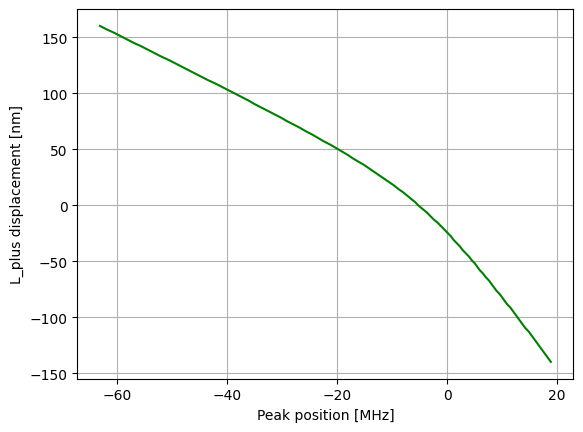

In [86]:
delta_L1_arr = np.linspace(-150e-9, 150e-9, 100)
delta_L2_arr = np.linspace(10e-9, 10e-9, 100)
delta_nu = np.linspace(-75e6, 75e6, 1000)
colors = ["hotpink", "green", "steelblue"]
peak_separation = []
res_omega = []
peak_pos = []
L_plus = []


# create the function
transmitted_power_numeric = transmitted_power.subs([(L1, L1a), (L2, L2a), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)])
function = lambdify((k, delta_L1, delta_L2), transmitted_power_numeric, "numpy")

for (d1, d2) in zip(delta_L1_arr, delta_L2_arr):
    # this is the true good way to go about it !!!!! (the shift in frequency)
    fsr = c / (2 * (L1a + L2a + d2 - d1))
    # to be resonant at our laser freq q must be 3.76e6, give or take, found by trial and error to match the resonant freq of the cavity to the laser freq
    resonance_nu = 3.76e6 * fsr
    nu_bottom = resonance_nu - 75e6
    nu_top = resonance_nu + 75e6
    nu_sweep = np.linspace(nu_bottom, nu_top, 1000)
    k_range = nu_sweep * 2 * np.pi / c
    values = function(k_range, d1, d2)

    res_omega.append(resonance_nu * 2 * np.pi)
    L_plus.append( (d1 + d2)*1e9)

    peaks, properties = find_peaks(values)
    peak_freqs_mhz = delta_nu[peaks] * 1e-6
    peak_pos.append(peak_freqs_mhz[0])


plt.plot(peak_pos, L_plus, c = "green")


plt.grid()
# plt.legend(loc = "lower left")
plt.ylabel("L_plus displacement [nm]")
plt.xlabel("Peak position [MHz]")

Text(0.5, 0, 'Peak position [MHz]')

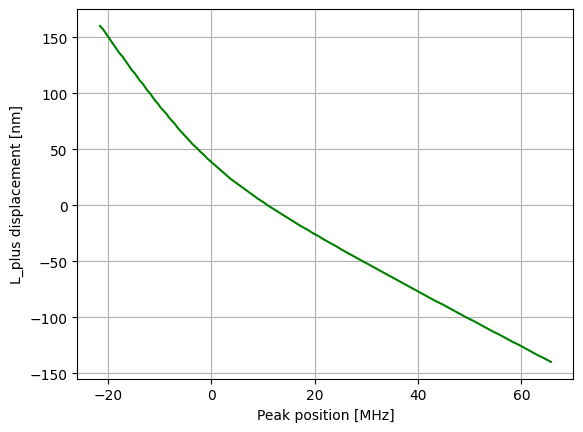

In [402]:
delta_L1_arr = np.linspace(-150e-9, 150e-9, 100)
delta_L2_arr = np.linspace(10e-9, 10e-9, 100)
delta_nu = np.linspace(-75e6, 75e6, 1000)
colors = ["hotpink", "green", "steelblue"]
peak_separation = []
res_omega = []
peak_pos = []
L_plus = []


# create the function
transmitted_power_numeric = transmitted_power.subs([(L1, L1a), (L2, L2a), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)])
function = lambdify((k, delta_L1, delta_L2), transmitted_power_numeric, "numpy")

for (d1, d2) in zip(delta_L1_arr, delta_L2_arr):
    # this is the true good way to go about it !!!!! (the shift in frequency)
    fsr = c / (2 * (L1a + L2a + d2 - d1))
    # to be resonant at our laser freq q must be 3.76e6, give or take, found by trial and error to match the resonant freq of the cavity to the laser freq
    resonance_nu = 3.76e6 * fsr
    nu_bottom = resonance_nu - 75e6
    nu_top = resonance_nu + 75e6
    nu_sweep = np.linspace(nu_bottom, nu_top, 1000)
    k_range = nu_sweep * 2 * np.pi / c
    values = function(k_range, d1, d2)

    res_omega.append(resonance_nu * 2 * np.pi)
    L_plus.append( (d1 + d2)*1e9)

    peaks, properties = find_peaks(values)
    peak_freqs_mhz = delta_nu[peaks] * 1e-6
    peak_pos.append(peak_freqs_mhz[1])


plt.plot(peak_pos, L_plus, c = "green")


plt.grid()
# plt.legend(loc = "lower left")
plt.ylabel("L_plus displacement [nm]")
plt.xlabel("Peak position [MHz]")

Text(0.5, 0, 'Peak position [MHz]')

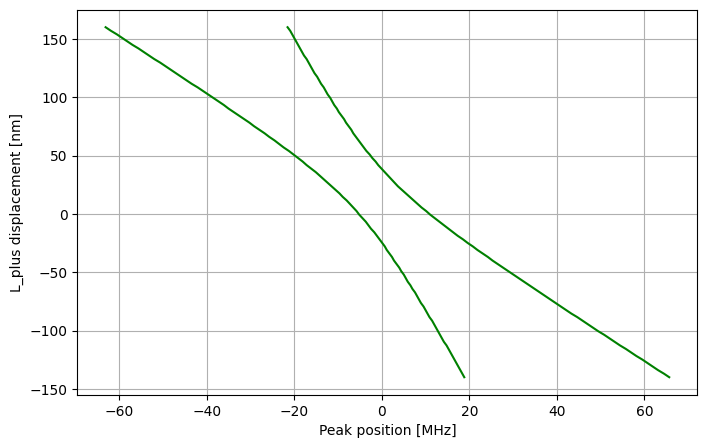

In [87]:
delta_L1_arr = np.linspace(-150e-9, 150e-9, 100)
delta_L2_arr = np.linspace(10e-9, 10e-9, 100)
delta_nu = np.linspace(-75e6, 75e6, 1000)
colors = ["hotpink", "green", "steelblue"]
peak_separation = []
res_omega = []
peak_pos = []
L_plus = []

plt.figure(figsize= (8, 5))

# create the function
transmitted_power_numeric = transmitted_power.subs([(L1, L1a), (L2, L2a), (t1, t1a), (t2, t2a), (t3,t3a), (r1, r1a), (r2,r2a), (r3,r3a)])
function = lambdify((k, delta_L1, delta_L2), transmitted_power_numeric, "numpy")

for (d1, d2) in zip(delta_L1_arr, delta_L2_arr):
    # this is the true good way to go about it !!!!! (the shift in frequency)
    fsr = c / (2 * (L1a + L2a + d2 - d1))
    # to be resonant at our laser freq q must be 3.76e6, give or take, found by trial and error to match the resonant freq of the cavity to the laser freq
    resonance_nu = 3.76e6 * fsr
    nu_bottom = resonance_nu - 75e6
    nu_top = resonance_nu + 75e6
    nu_sweep = np.linspace(nu_bottom, nu_top, 1000)
    k_range = nu_sweep * 2 * np.pi / c
    values = function(k_range, d1, d2)

    res_omega.append(resonance_nu * 2 * np.pi)
    L_plus.append( (d1 + d2)*1e9)

    peaks, properties = find_peaks(values)
    peak_freqs_mhz = delta_nu[peaks] * 1e-6
    peak_pos.append(peak_freqs_mhz)

plt.plot(peak_pos, L_plus, c = "green")


plt.grid()
# plt.legend(loc = "lower left")
plt.ylabel("L_plus displacement [nm]")
plt.xlabel("Peak position [MHz]")